# **CNN Model**

*Authors:*
- *Myroslava Sánchez Andrade A01730712*
- *Karen Rugerio Armenta A01733228*
- *José Antonio Bobadilla García A01734433*
- *Alejandro Castro Reus A01731065*

*Creation date: 15/10/2022*

*Last updated: 27/11/2022*

---

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib as mpl
from joblib import dump, load

In [2]:
# RUN ONLY FOR GOOGLE COLAB

from google.colab import drive

drive.mount("/content/gdrive")  

%cd "/content/gdrive/MyDrive/Colab Notebooks"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks


In [3]:
smote = False

In [4]:
# Obtaining the train and test dataset
x_test = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn/test/x_test.csv')
y_test = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn/test/y_test.csv')

In [5]:
if smote:
    x_train = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn/train/x_train.csv')
    y_train = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn/train/y_train.csv')
else:    
    # Dividing the train dataset
    train = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn/train/original_train.csv')
    x_train = train.drop(['Churn'], axis=1)
    y_train = pd.DataFrame(train['Churn'])

In [25]:
# Defining the model
cnn_model = models.Sequential()
cnn_model.add(layers.Conv1D(128, 3, activation='relu', input_shape=(x_train.shape[1],1)))
cnn_model.add(layers.MaxPooling1D(2))
cnn_model.add(layers.LeakyReLU())
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(layers.LeakyReLU())
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(2))

In [26]:
# Training the model 
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = cnn_model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
155/155 [==============================] - 1s 6ms/step - loss: 0.5323 - accuracy: 0.7305 - val_loss: 0.4864 - val_accuracy: 0.7434
Epoch 2/10
155/155 [==============================] - 1s 5ms/step - loss: 0.5054 - accuracy: 0.7311 - val_loss: 0.4846 - val_accuracy: 0.7562
Epoch 3/10
155/155 [==============================] - 1s 4ms/step - loss: 0.5007 - accuracy: 0.7497 - val_loss: 0.4760 - val_accuracy: 0.7580
Epoch 4/10
155/155 [==============================] - 1s 4ms/step - loss: 0.4978 - accuracy: 0.7564 - val_loss: 0.4719 - val_accuracy: 0.7670
Epoch 5/10
155/155 [==============================] - 1s 5ms/step - loss: 0.4936 - accuracy: 0.7538 - val_loss: 0.4816 - val_accuracy: 0.7642
Epoch 6/10
155/155 [==============================] - 1s 5ms/step - loss: 0.4888 - accuracy: 0.7564 - val_loss: 0.4664 - val_accuracy: 0.7689
Epoch 7/10
155/155 [==============================] - 1s 5ms/step - loss: 0.4830 - accuracy: 0.7656 - val_loss: 0.4716 - val_accuracy: 0.7590
Epoch 

In [27]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 3, 128)            512       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 1, 128)            0         
                                                                 
 dropout_5 (Dropout)         (None, 1, 128)            0         
                                                                 
 dense_12 (Dense)            (None, 1, 32)             4128      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 1, 32)             0         
                                                      

66/66 - 0s - loss: 0.4655 - accuracy: 0.7689 - 145ms/epoch - 2ms/step
0.7689393758773804


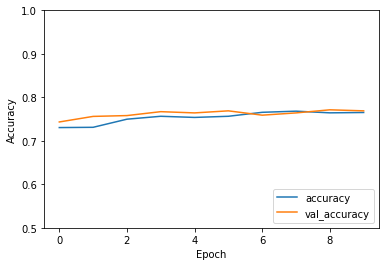

In [28]:
# Plotting the accuracy of the training (train and validation)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

In [29]:
# Calculating the MSE and accuracy in the training and test

# Train MSE and Accuracy
train_loss, train_acc = cnn_model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)

print(f'MSE Train: {1-train_acc}')
print(f'Accuracy Train: {train_acc}')

# Test MSE and Accuracy
print(f'MSE Test: {1-test_acc}')
print(f'Accuracy Test: {test_acc}')

155/155 - 1s - loss: 0.4641 - accuracy: 0.7802 - 531ms/epoch - 3ms/step
66/66 - 0s - loss: 0.4655 - accuracy: 0.7689 - 143ms/epoch - 2ms/step
MSE Train: 0.21983373165130615
Accuracy Train: 0.7801662683486938
MSE Test: 0.23106062412261963
Accuracy Test: 0.7689393758773804


### ***Improving the model***

In [23]:
# Improving the model
cnn_improved_model = models.Sequential()
cnn_improved_model.add(layers.Conv1D(32, 2, activation='relu', input_shape=(x_train.shape[1],1)))
cnn_improved_model.add(layers.Dense(16, activation='relu'))
cnn_improved_model.add(layers.MaxPooling1D(1))
cnn_model.add(layers.Dropout(0.3))
cnn_improved_model.add(layers.Conv1D(16, 2, activation='relu'))
cnn_improved_model.add(layers.Flatten())
cnn_improved_model.add(layers.Dense(16, activation='relu'))
cnn_improved_model.add(layers.Dense(2))

In [24]:
# Training the model 
cnn_improved_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = cnn_improved_model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
155/155 [==============================] - 1s 6ms/step - loss: 0.5344 - accuracy: 0.7335 - val_loss: 0.4656 - val_accuracy: 0.7661
Epoch 2/10
155/155 [==============================] - 1s 4ms/step - loss: 0.4571 - accuracy: 0.7834 - val_loss: 0.4529 - val_accuracy: 0.7723
Epoch 3/10
155/155 [==============================] - 1s 4ms/step - loss: 0.4453 - accuracy: 0.7919 - val_loss: 0.4509 - val_accuracy: 0.7760
Epoch 4/10
155/155 [==============================] - 1s 4ms/step - loss: 0.4408 - accuracy: 0.7972 - val_loss: 0.4446 - val_accuracy: 0.7798
Epoch 5/10
155/155 [==============================] - 1s 4ms/step - loss: 0.4395 - accuracy: 0.7964 - val_loss: 0.4495 - val_accuracy: 0.7794
Epoch 6/10
155/155 [==============================] - 1s 5ms/step - loss: 0.4407 - accuracy: 0.7919 - val_loss: 0.4454 - val_accuracy: 0.7827
Epoch 7/10
155/155 [==============================] - 1s 4ms/step - loss: 0.4371 - accuracy: 0.7923 - val_loss: 0.4531 - val_accuracy: 0.7732
Epoch 

In [17]:
cnn_improved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 32)             96        
                                                                 
 dense_3 (Dense)             (None, 4, 16)             528       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 16)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 16)             528       
                                                                 
 flatten_1 (Flatten)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                784       
                                                      

66/66 - 0s - loss: 0.4482 - accuracy: 0.7784 - 129ms/epoch - 2ms/step
0.7784090638160706


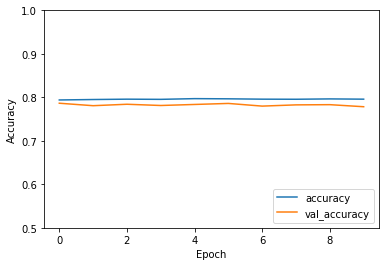

In [18]:
# Plotting the accuracy of the training (train and validation)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn_improved_model.evaluate(x_test, y_test, verbose=2)
print(test_acc)



In [19]:
# Calculating the MSE and accuracy in the training and test

# Train MSE and Accuracy
train_loss, train_acc = cnn_improved_model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = cnn_improved_model.evaluate(x_test, y_test, verbose=2)

print(f'MSE Train: {1-train_acc}')
print(f'Accuracy Train: {train_acc}')

# Test MSE and Accuracy
print(f'MSE Test: {1-test_acc}')
print(f'Accuracy Test: {test_acc}')

155/155 - 1s - loss: 0.4315 - accuracy: 0.7972 - 520ms/epoch - 3ms/step
66/66 - 0s - loss: 0.4482 - accuracy: 0.7784 - 130ms/epoch - 2ms/step
MSE Train: 0.20279860496520996
Accuracy Train: 0.79720139503479
MSE Test: 0.22159093618392944
Accuracy Test: 0.7784090638160706


In [30]:
if smote:
    dump(cnn_improved_model, "./cnn_model_smote.joblib")
else:
    dump(cnn_improved_model, "./cnn_model.joblib")